In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import itertools

import sys
sys.path.append('/mnt/disk1/yunseob/Pytorch/SSM/0_modules')
from SSM_utils import GBdataLoad, B6dataLoad
from SSM_DL_evl import SSM_Model

import seaborn as sns
sns.set(style="whitegrid")

# 1. Fault diagnosis

In [2]:
class_name = ['Good', 'Bad']

In [3]:
model_dir = './model/'
data_dir = '/mnt/disk1/yunseob/Pytorch/SSM/1_Semblex/08_shorten_length/SemblexData'

In [4]:
GB_accrs = []

Lengths = [25, 50, 75, 100]

for ls in Lengths:
    
    GB_test_X, GB_test_Y = GBdataLoad(data_dir + '/{:03d}s'.format(ls), ch = [0, 1], data_type = '4_test_data')
    
    GB_00p_A_model = SSM_Model(np.expand_dims(GB_test_X[:,0,:,:], axis = 1), GB_test_Y, n_ch = 1, n_cls = 2, 
                               class_name = class_name, model_dir = model_dir, model_name = '01_GB_00p_{:03d}_A'.format(ls), 
                               batch_size = 20, GPU_idx = 3)

    GB_00p_B_model = SSM_Model(np.expand_dims(GB_test_X[:,1,:,:], axis = 1), GB_test_Y, n_ch = 1, n_cls = 2, 
                               class_name = class_name, model_dir = model_dir, model_name = '01_GB_00p_{:03d}_B'.format(ls), 
                               batch_size = 20, GPU_idx = 3)
    
    GB_00p_AB_model = SSM_Model(GB_test_X, GB_test_Y, n_ch = 2, n_cls = 2, class_name = class_name, 
                                model_dir = model_dir, model_name = '01_GB_00p_{:03d}_AB'.format(ls), batch_size = 20, GPU_idx = 3)
    
    GB_00p_A_model.Evaluation()
    GB_00p_B_model.Evaluation()
    GB_00p_AB_model.Evaluation()
    GB_accrs.append([GB_00p_A_model.accr, GB_00p_B_model.accr, GB_00p_AB_model.accr])

Model: 01_GB_00p_025_A_0.01_128_2005210722_114_t_accr_1.0000_t_loss_0.000000_v_accr_0.9915_v_loss_0.094954.pt 

Accuracy: 98.71 % (4960 / 5025)

Model: 01_GB_00p_025_B_0.001_64_2005210455_089_t_accr_0.9997_t_loss_0.000873_v_accr_0.9925_v_loss_0.032171.pt 

Accuracy: 98.87 % (4968 / 5025)

Model: 01_GB_00p_025_AB_0.01_16_2005201409_053_t_accr_0.9997_t_loss_0.001460_v_accr_0.9970_v_loss_0.011669.pt 

Accuracy: 99.46 % (4998 / 5025)

Model: 01_GB_00p_050_A_0.001_128_2005211111_208_t_accr_0.9999_t_loss_0.000344_v_accr_0.9900_v_loss_0.068247.pt 

Accuracy: 98.21 % (2465 / 2510)

Model: 01_GB_00p_050_B_0.001_32_2005211023_245_t_accr_0.9997_t_loss_0.001186_v_accr_0.9980_v_loss_0.007854.pt 

Accuracy: 98.96 % (2484 / 2510)

Model: 01_GB_00p_050_AB_0.001_16_2005201625_202_t_accr_1.0000_t_loss_0.000012_v_accr_0.9990_v_loss_0.006638.pt 

Accuracy: 99.60 % (2500 / 2510)

Model: 01_GB_00p_075_A_0.001_64_2005211520_307_t_accr_1.0000_t_loss_0.000256_v_accr_0.9880_v_loss_0.076724.pt 

Accuracy: 98.27 

In [5]:
GB_df = pd.DataFrame(columns = ['Segment Length', 'Model', 'Accuracy (%)'])

for i, ls, accrs in zip(range(4), Lengths, GB_accrs):
    if i < 3:
        GB_df.loc[3*i] = ['0.{}s'.format(ls), 'A1', accrs[0]]
        GB_df.loc[3*i+1] = ['0.{}s'.format(ls), 'A2', accrs[1]]
        GB_df.loc[3*i+2] = ['0.{}s'.format(ls), 'A1 & A2', accrs[2]]
    else:
        GB_df.loc[3*i] = ['1.00s', 'A1', accrs[0]]
        GB_df.loc[3*i+1] = ['1.00s', 'A2', accrs[1]]
        GB_df.loc[3*i+2] = ['1.00s', 'A1 & A2', accrs[2]]
GB_df

,Segment Length,Model,Accuracy (%)
0,0.25s,A1,98.71
1,0.25s,A2,98.87
2,0.25s,A1 & A2,99.46
3,0.50s,A1,98.21
4,0.50s,A2,98.96
5,0.50s,A1 & A2,99.60
6,0.75s,A1,98.27
7,0.75s,A2,99.05
8,0.75s,A1 & A2,99.40
9,1.00s,A1,97.69


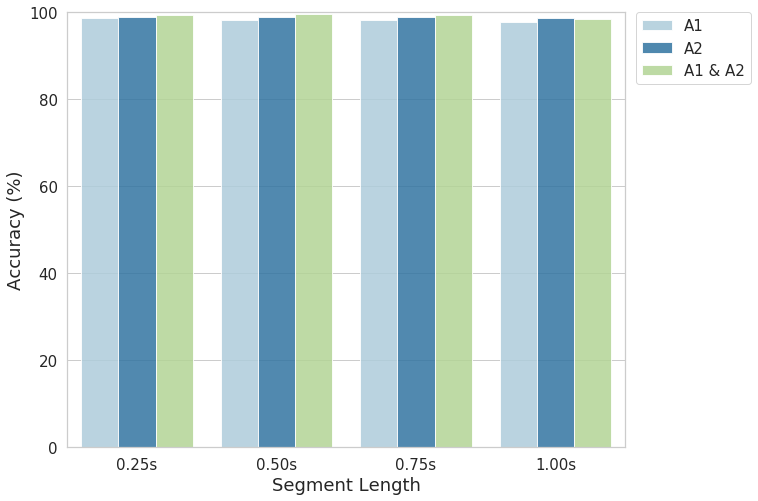

In [6]:
fig = plt.figure(figsize = (10, 8))
sns.barplot(x = 'Segment Length', y = 'Accuracy (%)', hue = 'Model', data = GB_df, palette = 'Paired', alpha = 0.85)
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0., fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.ylim([0, 100])
plt.xlabel('Segment Length', fontsize = 18)
plt.ylabel('Accuracy (%)', fontsize = 18)
plt.show()

# 2. Fault classification

In [11]:
class_name = ['Heavy Oil', 'Die Punch', 'Scrapped Wire', 'Die Chip', 'Die Internal', 'PIN']

In [12]:
data_dir = '/mnt/disk1/yunseob/Pytorch/SSM/1_Semblex/08_shorten_length/SemblexData'
model = './model/'

B6_accrs = []

Lengths = [25, 50, 75, 100]

for ls in Lengths:
    
    B6_test_X, B6_test_Y = B6dataLoad(data_dir + '/{:03d}s'.format(ls), ch = [0, 1], data_type = '4_test_data')
    
    B6_00p_A_model = SSM_Model(np.expand_dims(B6_test_X[:,0,:,:], axis = 1), B6_test_Y, n_ch = 1, n_cls = 6, 
                               class_name = class_name, model_dir = model_dir, model_name = '01_B6_00p_{:03d}_A'.format(ls), 
                               batch_size = 20, GPU_idx = 3)

    B6_00p_B_model = SSM_Model(np.expand_dims(B6_test_X[:,1,:,:], axis = 1), B6_test_Y, n_ch = 1, n_cls = 6, 
                               class_name = class_name, model_dir = model_dir, model_name = '01_B6_00p_{:03d}_B'.format(ls), 
                               batch_size = 20, GPU_idx = 3)
    
    B6_00p_AB_model = SSM_Model(B6_test_X, B6_test_Y, n_ch = 2, n_cls = 6, class_name = class_name, 
                                model_dir = model_dir, model_name = '01_B6_00p_{:03d}_AB'.format(ls), batch_size = 20, GPU_idx = 3)
    
    B6_00p_A_model.Evaluation()
    B6_00p_B_model.Evaluation()
    B6_00p_AB_model.Evaluation()
    B6_accrs.append([B6_00p_A_model.accr, B6_00p_B_model.accr, B6_00p_AB_model.accr])

Model: 01_B6_00p_025_A_0.01_32_2005210452_121_t_accr_0.9972_t_loss_0.009616_v_accr_0.9144_v_loss_0.927969.pt 

Accuracy: 89.79 % (2753 / 3066)

Model: 01_B6_00p_025_B_0.001_32_2005220144_101_t_accr_0.9983_t_loss_0.004942_v_accr_0.9348_v_loss_0.549196.pt 

Accuracy: 91.59 % (2808 / 3066)

Model: 01_B6_00p_025_AB_0.001_32_2005211614_102_t_accr_0.9971_t_loss_0.010975_v_accr_0.9707_v_loss_1.922117.pt 

Accuracy: 95.08 % (2915 / 3066)

Model: 01_B6_00p_050_A_0.01_16_2005210748_225_t_accr_0.9996_t_loss_0.001537_v_accr_0.9349_v_loss_0.539604.pt 

Accuracy: 89.36 % (1369 / 1532)

Model: 01_B6_00p_050_B_0.001_8_2005220356_218_t_accr_1.0000_t_loss_0.000036_v_accr_0.9495_v_loss_0.429538.pt 

Accuracy: 91.19 % (1397 / 1532)

Model: 01_B6_00p_050_AB_0.01_8_2005211843_165_t_accr_1.0000_t_loss_0.000013_v_accr_0.9577_v_loss_0.404131.pt 

Accuracy: 95.04 % (1456 / 1532)

Model: 01_B6_00p_075_A_0.01_8_2005221613_298_t_accr_0.9989_t_loss_0.002957_v_accr_0.9000_v_loss_1.615103.pt 

Accuracy: 85.45 % (875 

In [13]:
B6_df = pd.DataFrame(columns = ['Segment Length', 'Model', 'Accuracy (%)'])

for i, ls, accrs in zip(range(4), Lengths, B6_accrs):
    if i < 3:
        B6_df.loc[3*i] = ['0.{}s'.format(ls), 'A1', accrs[0]]
        B6_df.loc[3*i+1] = ['0.{}s'.format(ls), 'A2', accrs[1]]
        B6_df.loc[3*i+2] = ['0.{}s'.format(ls), 'A1 & A2', accrs[2]]
    else:
        B6_df.loc[3*i] = ['1.00s', 'A1', accrs[0]]
        B6_df.loc[3*i+1] = ['1.00s', 'A2', accrs[1]]
        B6_df.loc[3*i+2] = ['1.00s', 'A1 & A2', accrs[2]]
B6_df

,Segment Length,Model,Accuracy (%)
0,0.25s,A1,89.79
1,0.25s,A2,91.59
2,0.25s,A1 & A2,95.08
3,0.50s,A1,89.36
4,0.50s,A2,91.19
5,0.50s,A1 & A2,95.04
6,0.75s,A1,85.45
7,0.75s,A2,90.82
8,0.75s,A1 & A2,92.87
9,1.00s,A1,87.11


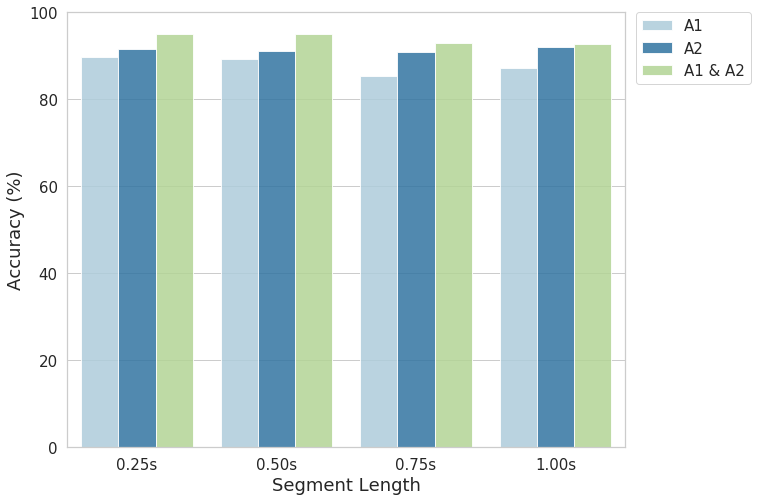

In [14]:
fig = plt.figure(figsize = (10, 8))
sns.barplot(x = 'Segment Length', y = 'Accuracy (%)', hue = 'Model', data = B6_df, palette = 'Paired', alpha = 0.85)
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0., fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.ylim([0, 100])
plt.xlabel('Segment Length', fontsize = 18)
plt.ylabel('Accuracy (%)', fontsize = 18)
plt.show()

In [14]:


B6_accrs = []

Lengths = [25, 50, 75]

for ls in Lengths:
    
    B6_test_X, B6_test_Y = B6dataLoad(data_dir + '/0{}s'.format(ls), ch = [0, 1], data_type = '4_test_data')
    
    B6_00p_A_model = SSM_Model(np.expand_dims(B6_test_X[:,0,:,:], axis = 1), B6_test_Y, n_ch = 1, n_cls = 6, 
                               class_name = class_name, model_dir = model_dir, model_name = '01_B6_00p_0{}_A'.format(ls), 
                               batch_size = 20, GPU_idx = 3)

    B6_00p_B_model = SSM_Model(np.expand_dims(B6_test_X[:,1,:,:], axis = 1), B6_test_Y, n_ch = 1, n_cls = 6, 
                               class_name = class_name, model_dir = model_dir, model_name = '01_B6_00p_0{}_B'.format(ls), 
                               batch_size = 20, GPU_idx = 3)
    
    B6_00p_AB_model = SSM_Model(B6_test_X, B6_test_Y, n_ch = 2, n_cls = 6, class_name = class_name, 
                                model_dir = model_dir, model_name = '01_B6_00p_0{}_AB'.format(ls), batch_size = 20, GPU_idx = 3)
    
    B6_00p_A_model.Evaluation()
    B6_00p_B_model.Evaluation()
    B6_00p_AB_model.Evaluation()
    B6_accrs.append([B6_00p_A_model.accr, B6_00p_B_model.accr, B6_00p_AB_model.accr])

Model: 01_B6_00p_025_A_0.01_32_2005210452_121_t_accr_0.9972_t_loss_0.009616_v_accr_0.9144_v_loss_0.927969.pt 

Accuracy: 89.79 % (2753 / 3066)

Model: 01_B6_00p_025_B_0.001_32_2005220144_101_t_accr_0.9983_t_loss_0.004942_v_accr_0.9348_v_loss_0.549196.pt 

Accuracy: 91.59 % (2808 / 3066)

Model: 01_B6_00p_025_AB_0.001_32_2005211614_102_t_accr_0.9971_t_loss_0.010975_v_accr_0.9707_v_loss_1.922117.pt 

Accuracy: 95.08 % (2915 / 3066)

Model: 01_B6_00p_050_A_0.01_16_2005210748_225_t_accr_0.9996_t_loss_0.001537_v_accr_0.9349_v_loss_0.539604.pt 

Accuracy: 89.36 % (1369 / 1532)

Model: 01_B6_00p_050_B_0.001_8_2005220356_218_t_accr_1.0000_t_loss_0.000036_v_accr_0.9495_v_loss_0.429538.pt 

Accuracy: 91.19 % (1397 / 1532)

Model: 01_B6_00p_050_AB_0.01_8_2005211843_165_t_accr_1.0000_t_loss_0.000013_v_accr_0.9577_v_loss_0.404131.pt 

Accuracy: 95.04 % (1456 / 1532)

Model: 01_B6_00p_075_A_0.001_32_2005211019_361_t_accr_1.0000_t_loss_0.000006_v_accr_0.8732_v_loss_1.262063.pt 

Accuracy: 83.69 % (85

In [15]:
B6_df = pd.DataFrame(columns = ['Segment Length', 'Model', 'Accuracy (%)'])

for i, ls, accrs in zip(range(5), Lengths, B6_accrs):
    B6_df.loc[3*i] = ['0.{}s'.format(ls), 'A1', accrs[0]]
    B6_df.loc[3*i+1] = ['0.{}s'.format(ls), 'A2', accrs[1]]
    B6_df.loc[3*i+2] = ['0.{}s'.format(ls), 'A1 & A2', accrs[2]]
    
B6_df

,Segment Length,Model,Accuracy (%)
0,0.25s,A1,89.79
1,0.25s,A2,91.59
2,0.25s,A1 & A2,95.08
3,0.50s,A1,89.36
4,0.50s,A2,91.19
5,0.50s,A1 & A2,95.04
6,0.75s,A1,83.69
7,0.75s,A2,90.82
8,0.75s,A1 & A2,92.38


In [ ]:
data_dir = '/mnt/disk1/yunseob/Pytorch/SSM/1_Semblex/06_no_overlap/SemblexData/wt_4040/'
model_dir = '/mnt/disk1/yunseob/Pytorch/SSM/1_Semblex/07_number_of_training_sample/model/'

B6_test_X, B6_test_Y = B6dataLoad(data_dir, ch = [0, 1], data_type = '4_test_data')

sr = 1

B6_00p_A_model = SSM_Model(np.expand_dims(B6_test_X[:,0,:,:], axis = 1), B6_test_Y, n_ch = 1, n_cls = 6, 
                               class_name = class_name, model_dir = model_dir, model_name = '01_B6_00p_{}_A'.format(sr), 
                               batch_size = 20, GPU_idx = 3)

B6_00p_B_model = SSM_Model(np.expand_dims(B6_test_X[:,1,:,:], axis = 1), B6_test_Y, n_ch = 1, n_cls = 6, 
                           class_name = class_name, model_dir = model_dir, model_name = '01_B6_00p_{}_B'.format(sr), 
                           batch_size = 20, GPU_idx = 3)

B6_00p_AB_model = SSM_Model(B6_test_X, B6_test_Y, n_ch = 2, n_cls = 6, class_name = class_name, 
                            model_dir = model_dir, model_name = '01_B6_00p_{}_AB'.format(sr), batch_size = 20, GPU_idx = 3)

B6_00p_A_model.Evaluation()
B6_00p_B_model.Evaluation()
B6_00p_AB_model.Evaluation()
B6_accrs.append([B6_00p_A_model.accr, B6_00p_B_model.accr, B6_00p_AB_model.accr])

In [ ]:
for i, accrs in zip(range(3,4), B6_accrs[3:]):
    B6_df.loc[3*i] = ['1.00s', 'A1', accrs[0]]
    B6_df.loc[3*i+1] = ['1.00s', 'A2', accrs[1]]
    B6_df.loc[3*i+2] = ['1.00s', 'A1 & A2', accrs[2]]
    
B6_df

In [ ]:
fig = plt.figure(figsize = (10, 8))
sns.barplot(x = 'Segment Length', y = 'Accuracy (%)', hue = 'Model', data = B6_df, palette = 'Paired', alpha = 0.85)
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0., fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.ylim([0, 100])
plt.xlabel('Segment Length', fontsize = 18)
plt.ylabel('Accuracy (%)', fontsize = 18)
plt.show()